In [5]:
!pip install -r requirements.txt

     |████████████████████████████████| 24.0 MB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.2 MB 85.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 24.4 MB/s eta 0:00:01
     |████████████████████████████████| 17.1 MB 24.5 MB/s eta 0:00:01                     | 1.8 MB 24.5 MB/s eta 0:00:01[K     |███████▎                        | 3.9 MB 24.5 MB/s eta 0:00:01��█▎                | 8.1 MB 24.5 MB/s eta 0:00:01�██▍        | 12.4 MB 24.5 MB/s eta 0:00:01
     |████████████████████████████████| 11.7 MB 86.8 MB/s eta 0:00:01�██████████████████      | 9.5 MB 86.8 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 1.1 MB/s  eta 0:00:01
     |████████████████████████████████| 6.3 MB 14.6 MB/s eta 0:00:01
     |████████████████████████████████| 776.3 MB 5.6 kB/s  eta 0:00:014B 12.0 MB/s eta 0:01:030201     |██▍                             | 57.0 MB 12.0 MB/s eta 0:01:00     |███▋                            | 88.1 MB 17.2 MB/s eta 0:00:40��         

In [223]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

ModuleNotFoundError: No module named 'wordcloud'

## Creating dataframe from raw data.

In [4]:
#Defining functions for opening the json files and converting them into dataframes.
def get_json(file):
    
    f = open(file)
    data = json.load(f)
    return data

In [12]:
#Store the file location of each slice of data.
json_location_list=os.listdir('./data/')
json_location_list=["./data/"+ location for location in json_location_list]

In [15]:
#This stores all json file data
jsons=[get_json(i) for i in json_location_list[:10]]

In [21]:
# Convert json files to data frames.
def get_dataframes(json_file):
    # Calling the first JSON file and viewing the object
    js1_items = json_file.items()
    # Turning the items from the first JSON file into a list
    js1_list = list(js1_items)
    # Creating a DataFrame from the list
    return pd.DataFrame(js1_list)

In [92]:
#All jsons have an individual dataframe stored in a list.
dfs = [get_dataframes(i) for i in jsons]

In [93]:
dfs[1].head()

,0,1
0,info,"{'generated_on': '2017-12-03 08:41:42.057563',..."
1,playlists,"[{'name': 'disney', 'collaborative': 'false', ..."


We can see that the dataframe is not yet usable. We need to make a clean dataframe.

In [104]:
#Store the nested elements of the frame
testr = []
countdf = 0
countitem = 0
for i in dfs:
    countdf += 1
    for j in i[1]:
        countitem+=1
        testr.append(j)

In [110]:
testr=[testr[i] for i in range(1,20,2)]

In [126]:
len(testr)

10

In [ ]:
testr[0][:1]

In [134]:
#Creating the dataframe for songs.
df=pd.DataFrame()
def create_df(var):    
    global df
    songs=pd.json_normalize(var,record_path=['tracks'])
    df = pd.concat([df,songs], axis=0)

In [135]:
for i in range(10):
    create_df(testr[i])

In [136]:
df.size

5335672

In [139]:
songs = df

In [224]:
songs.tail()

,pid,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name
64934,9999,161,Mc Magic,spotify:track:2ovm5VZJ36s3HKF8nkcIZI,spotify:artist:3cuVSUrq0yoSSP7gpvI6q1,Sexy Lady,spotify:album:7BlkHZxgF2tX7lk12c3DOa,234840,MAGIC CITY
64935,9999,162,Mc Magic,spotify:track:2IqCOKEx7mzSp4BTxkdFIV,spotify:artist:3cuVSUrq0yoSSP7gpvI6q1,Be With You,spotify:album:7BlkHZxgF2tX7lk12c3DOa,250093,MAGIC CITY
64936,9999,163,Céline Dion,spotify:track:4Dw02sVUfUA67l3fZ9FoKs,spotify:artist:4S9EykWXhStSc15wEx8QFK,"My Heart Will Go On - Love Theme from ""Titanic""",spotify:album:05HEjdd9s8Egs5aa3r0YIF,280133,All The Way... A Decade Of Song
64937,9999,164,Céline Dion,spotify:track:4qhkS0lRL2GgDxpuIr2Mbb,spotify:artist:4S9EykWXhStSc15wEx8QFK,"Because You Loved Me (Theme from ""Up Close and...",spotify:album:05HEjdd9s8Egs5aa3r0YIF,273026,All The Way... A Decade Of Song
64938,9999,165,Amanda Perez,spotify:track:2FQ5y4bYmq2h974oUBxoZH,spotify:artist:5DqmNLPM1kAbSBQk2FMm6b,Goodbye,spotify:album:6flBGbh4DeR2edxBff0WbO,250186,The Hand Of Fate


In [239]:
playlists = pd.DataFrame()
def create_p_df(var):
    global playlists
    playlist = pd.json_normalize(var)
    playlists = pd.concat([playlist,playlists], axis=0)

In [240]:
for i in range(10):
    create_p_df(testr[i])

In [241]:
playlists.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,tracks,num_edits,duration_ms,num_artists,description
0,Happy,false,11000,1479945600,46,42,1,"[{'pos': 0, 'artist_name': 'John Mayer', 'trac...",16,10467071,40,NaN
1,Crowd Pleasers,false,11001,1485561600,62,52,1,"[{'pos': 0, 'artist_name': 'Shaggy', 'track_ur...",7,14558428,38,NaN
2,2016,false,11002,1469059200,36,33,2,"[{'pos': 0, 'artist_name': 'Unknown Mortal Orc...",16,10609887,30,NaN
3,Halloween,false,11003,1509408000,45,32,1,"[{'pos': 0, 'artist_name': 'John Carpenter', '...",3,11938641,28,NaN
4,random stuff!,false,11004,1487548800,48,44,2,"[{'pos': 0, 'artist_name': 'Petite Noir', 'tra...",12,11019277,40,NaN


In [242]:
playlists = playlists.drop('tracks', axis =1)

In [243]:
playlists.shape

(10000, 11)

In [244]:
playlists['pid'] = playlists.index
playlists

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
0,Happy,false,0,1479945600,46,42,1,16,10467071,40,NaN
1,Crowd Pleasers,false,1,1485561600,62,52,1,7,14558428,38,NaN
2,2016,false,2,1469059200,36,33,2,16,10609887,30,NaN
3,Halloween,false,3,1509408000,45,32,1,3,11938641,28,NaN
4,random stuff!,false,4,1487548800,48,44,2,12,11019277,40,NaN
...,...,...,...,...,...,...,...,...,...,...,...
995,old,false,995,1507852800,41,40,1,8,9917901,36,NaN
996,Daze,false,996,1479254400,17,17,1,13,3699248,15,NaN
997,rap,false,997,1410307200,119,98,1,63,27538723,82,NaN
998,Country,false,998,1507939200,108,75,1,37,24950143,40,NaN


In [245]:
pid_column = playlists.pop('pid')

In [246]:
playlists.insert(loc = 0, column = 'pid' ,value = [i for i in range(10000)])

In [247]:
playlists.head()

,pid,name,collaborative,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists,description
0,0,Happy,false,1479945600,46,42,1,16,10467071,40,NaN
1,1,Crowd Pleasers,false,1485561600,62,52,1,7,14558428,38,NaN
2,2,2016,false,1469059200,36,33,2,16,10609887,30,NaN
3,3,Halloween,false,1509408000,45,32,1,3,11938641,28,NaN
4,4,random stuff!,false,1487548800,48,44,2,12,11019277,40,NaN


In [248]:
pid_list_for_songs = []
pid=0
for num_tracks in playlists['num_tracks']:
  for i in range(num_tracks):
    pid_list_for_songs.append(pid)
  pid+=1


In [249]:
songs = songs.insert(loc = 0, column = 'pid' ,value = pid_list_for_songs)

ValueError: cannot insert pid, already exists

In [250]:
playlists.shape

(10000, 11)

In [251]:
print(f"{songs.pid.nunique()} playlists in dataset")

10000 playlists in dataset


In [252]:
list(playlists.columns), list(songs.columns)

(['pid',
  'name',
  'collaborative',
  'modified_at',
  'num_tracks',
  'num_albums',
  'num_followers',
  'num_edits',
  'duration_ms',
  'num_artists',
  'description'],
 ['pid',
  'pos',
  'artist_name',
  'track_uri',
  'artist_uri',
  'track_name',
  'album_uri',
  'duration_ms',
  'album_name'])

In [253]:
print(f"Approximately {songs.shape[0] / playlists.shape[0]:.1f} songs per playlist") # mean playlist length
print(f"Longest playlist: {playlists.num_tracks.max()} songs") # longest playlist
print(f"Shortest playlist: {playlists.num_tracks.min()} songs") # shortest playlist

Approximately 66.7 songs per playlist
Longest playlist: 250 songs
Shortest playlist: 5 songs


### Important Considerations

#### Overall demographics of users contributing to the MPD

##### Gender
 * Male: 45%
 * Female: 54%
 * Unspecified: 0.5%
 * Nonbinary: 0.5%

##### Age
 * 13-17:  10%
 * 18-24:  43%
 * 25-34:  31%
 * 35-44:   9%
 * 45-54:   4%
 * 55+:     3%

##### Country
 * US: 100%
 
#### Time Created

- ##### "These playlists were created during the period of January 2010 through October 2017."

### Helpful Functions & Dicts

In [258]:
def get_playlist_info(pid):
    return playlists.loc(pid)

def get_playlist(pid):
    return songs[songs['pid'] == pid]

# Dict #1: {pid: playlist_name}
pid_name_df = playlists[['pid', 'name']]
pid_to_name = {pid_name_df['pid'][i]: pid_name_df['name'][i] for i in range(pid_name_df.shape[0])}
del pid_name_df # remove from memory

# Dict #2: {pid: playlist_followers}
pid_followers_df = playlists[['pid', 'num_followers']]
pid_to_followers = {pid_followers_df['pid'][i]: pid_followers_df['num_followers'][i] for i in range(pid_followers_df.shape[0])}
del pid_followers_df # remove from memory

### EDA - Feature Analysis

In [259]:
# separate features for EDA

# (1) Playlists DataFrame
text_p = ['name', 'description']
temporal_p = ['modified_at'] # in 'seconds since last epoch' (playlists created btw 2010 and 2017)
num_dis_p = ['pid', 'num_edits', 'num_artists', 'num_tracks', 'num_albums', 'num_followers']
num_cont_p = ['duration_ms']
cat_nom_p = ['collaborative']

# (2) Songs DataFrame
test_s = ['track_name', 'artist_name', 'album_name']
num_dis_s = ['pid', 'playlist_pos']
spotify_codes = ['track_uri', 'artist_uri', 'album_uri']

#### Playlist 'Last Modification' Date

In [260]:
playlists.modified_at.min(), playlists.modified_at.max() # not quite sure what to do with this feature

(1310601600, 1509494400)

This feature describes the seconds since the last modification of the playlist. Because each measurement of seconds is rounded up to midnight of that day, we can convert seconds to days.

_*It's helpful to consider once again that all playlists in the dataset were created between 2010 to 2017._

In [261]:
playlists.modified_at / (60 * 60 * 24) # / [(sec/min) x (min/hour) x (hour/day)]

0      17129.0
1      17194.0
2      17003.0
3      17470.0
4      17217.0
        ...   
995    17452.0
996    17121.0
997    16323.0
998    17453.0
999    17451.0
Name: modified_at, Length: 10000, dtype: float64

<font color='red'> This is only so helpful, for its hard to determine from the documentation the date from which these values began counting 😕 </font>

#### Playlist Descriptions

In [262]:
print(f"{100001 - playlists.description.isnull().sum()} non-null playlist descriptions")

90197 non-null playlist descriptions


In [263]:
print(f"{playlists.description.nunique() - 1} unique descriptions")

195 unique descriptions


In [264]:
# example of 10 playlist descriptions
list(playlists.description.unique()[1:11])

['this playlist contains pretty much all my favorite songs and new songs I like.',
 'My Rock&#x2F;Industrial Playlist is getting huge! Time to break it up. Grunge is here - includes Alice in Chains, Sound Garden, Pearl Jam. I&#x27;m throwing Alice In Chains new stuff in here too, just to keep it all together.',
 'Es espanish musica.',
 '[datains]=C-&#x2F;&#x2F;txt= This account has been hacked. Enjoy.',
 'a sentimential longing or wistful affection for the past',
 'songs for my sister',
 'best time of year',
 'Makes you feel good boi :)',
 'none of these good times will ever last',
 'Classic yet creative - folk house']

In [265]:


stop_words = ['as', 'the', 'and', 'that', 'our', 'my', 'they', 'in', 'on', 'of', 'that', 'this', 'or', 'are',
              'be', 'from', 'for', 'but', 'not', 'so', 'no', 'we', 'us', 'your', 'you', 'playlist', 'my', 'everything',
              'music', 'it', 'all', 'is', 'some', 'when', 'me', 'like', 'these', 'have', 'will', 'about', 'song', 'most',
              'to', 'get', 'with', 'out', 'at', 're', 'by', 'don', 'if', 'can', 'its', 'only', 'an', 'while', 'im',
              'dont', 'here', 'just', 'stuff', 've', 'quot', 'up', 'one', 'really', 'll', 'made', 'too', 'down', 'best',
              'listen', 'feel', 'songs', 'x27', 'x2f', 'a', 's', 'good', 'collection', 'year', 'what', 'vibe', 'great',
              'tune', 'I', 't', 'know', 'mix', 'u', 'want', 'keep', 'got', 'tunes', 'every', 'vibes', 'mostly', 'favorites',
              'listening', 'there', 'those', 'ever', 'm', 'favorite', 'who', 'time', 'something', 'has', 'D', 'more'
              'feeling', 'other', 'artist', 'life', 'mood', 'was', 'lt', 'R', 'lot', 'around', 'because', 'never', 'then',
              'than', 'track', 'listened', 'into', 'do', 'e', 'beat', 'them', 'way', 'through', 'self', 'take', 'more',
              'could', 'feelin', 'B', 'sound', 'thing', 'top', 'where', 'always', 'am', 'make', 'feeling', 'use',
              'he', 'how', 'P', 'things', 'wanted', 'fav', 'everyone']

NameError: name 'WordCloud' is not defined

In [266]:
# # stop_words = []
# desc_tokens = nltk.word_tokenize(unique_desc[1])
# cv = CountVectorizer(stop_words=stop_words, ngram_range=(1, 3))
# count_arr = cv.fit_transform(list(unique_desc[1:])).toarray()
# tokens = cv.get_feature_names_out()
# count_df = pd.DataFrame(data=count_arr, columns=tokens)
# # list(count_df.sum().sort_values(ascending=False).index[:100])

#### Playlist Names

Check lengths of playlist names, create horiz. bar chart to visualize (discrete numerical feature):



Mean playlist name length: 1.42 words
Min playlist name length: 1 words
Max playlist name length: 9 words


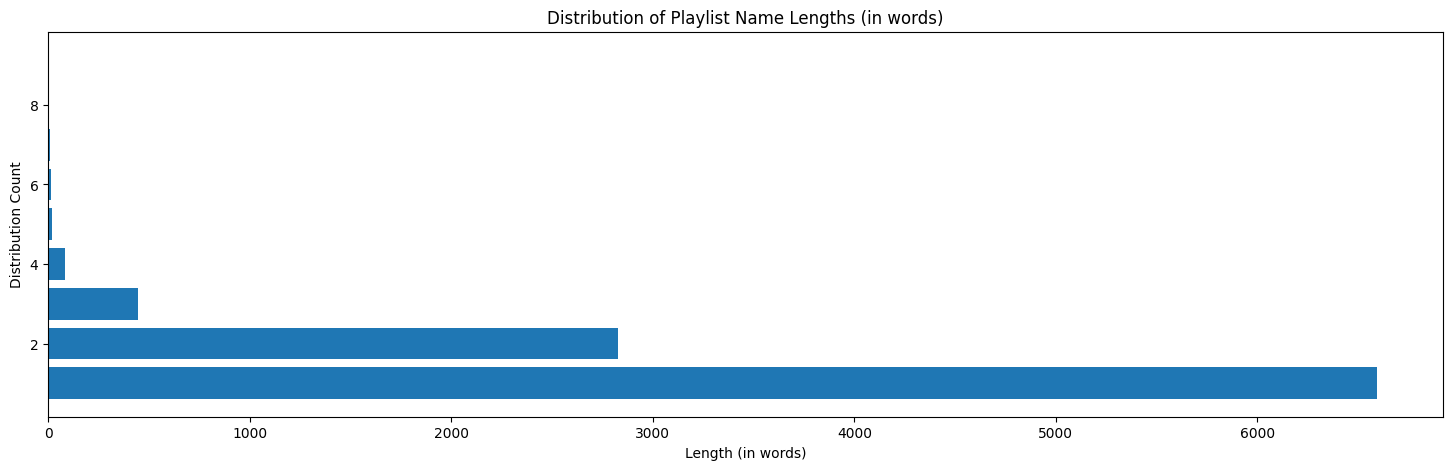

1    6592
2    2827
3     444
4      85
5      21
6      15
7       8
8       5
9       3
Name: Len. Playlist Names, dtype: int64

In [267]:
playlist_name_lengths = pd.Series([len(name.split()) for name in list(playlists.name) if name is not np.nan], name='Len. Playlist Names')
pnlvc = playlist_name_lengths.value_counts()
print(f"Mean playlist name length: {playlist_name_lengths.mean():.2f} words")
print(f"Min playlist name length: {playlist_name_lengths.min()} words")
print(f"Max playlist name length: {playlist_name_lengths.max()} words")

plt.figure(figsize=(18,5))
plt.barh(y=pnlvc.index, width=pnlvc.values)
plt.title('Distribution of Playlist Name Lengths (in words)')
plt.ylabel('Distribution Count')
plt.xlabel('Length (in words)')
plt.show()

# Print value counts to see values that are too small to see in the chart below
pnlvc

Above we can see a word cloud of the top 200 tokens that appeared in all playlist names in the dataset, in which we can find:

- Genres
    - Rock
    - Classic (Rock)
    - Rap
    - Indie
    - Country
    - Rock
    - Pop
    - Alternative
    - Classical
    - Soundtracks
- Types of Sound
    - Piano
    - Acoustic
    - Electro
    - Jamz (rhythmic, upbeat)
    - SLO, Slow (slow)
    - Bangaz (energetic, upbeat)
    - Groove (smooth)
- Activities/Events
    - Shower
    - Wedding
    - Party
    - Running
    - Workout
    - Gym
    - Beach
    - Driving (Jeep, Car)
    - Study
    - Adventure
- Time/Season/Era
    - 2k17
    - Weekend
    - December
    - Old
    - New
    - Throwbacks
- Artists
    - Justin (Bieber, Timberlake)
    - Kodak (Black)
    - Bruno, Mars (Bruno Mars)
    - Jack (Harlow)
    - Eyed (Black Eyed Peas)
    - Cole (J. Cole)
- Religious/Cultural
    - Christmas
    - Black
    - Worship
- Languages
    - Spanish
- Other
    - Random
    - Disney

Perhaps even moreso with the palylist namse than with the playlist descriptions, we can see that there are many ways to describe a playlist mood. Again, this is important to understand as we look to develop our playlist generator, we will have to reverse engineer this relationship, **generating playlists that accurately reflect how different words and phrases (activities, events, genres, sounds, times, artists, etc.) impact the mood of a playlist**

#### Artist Names

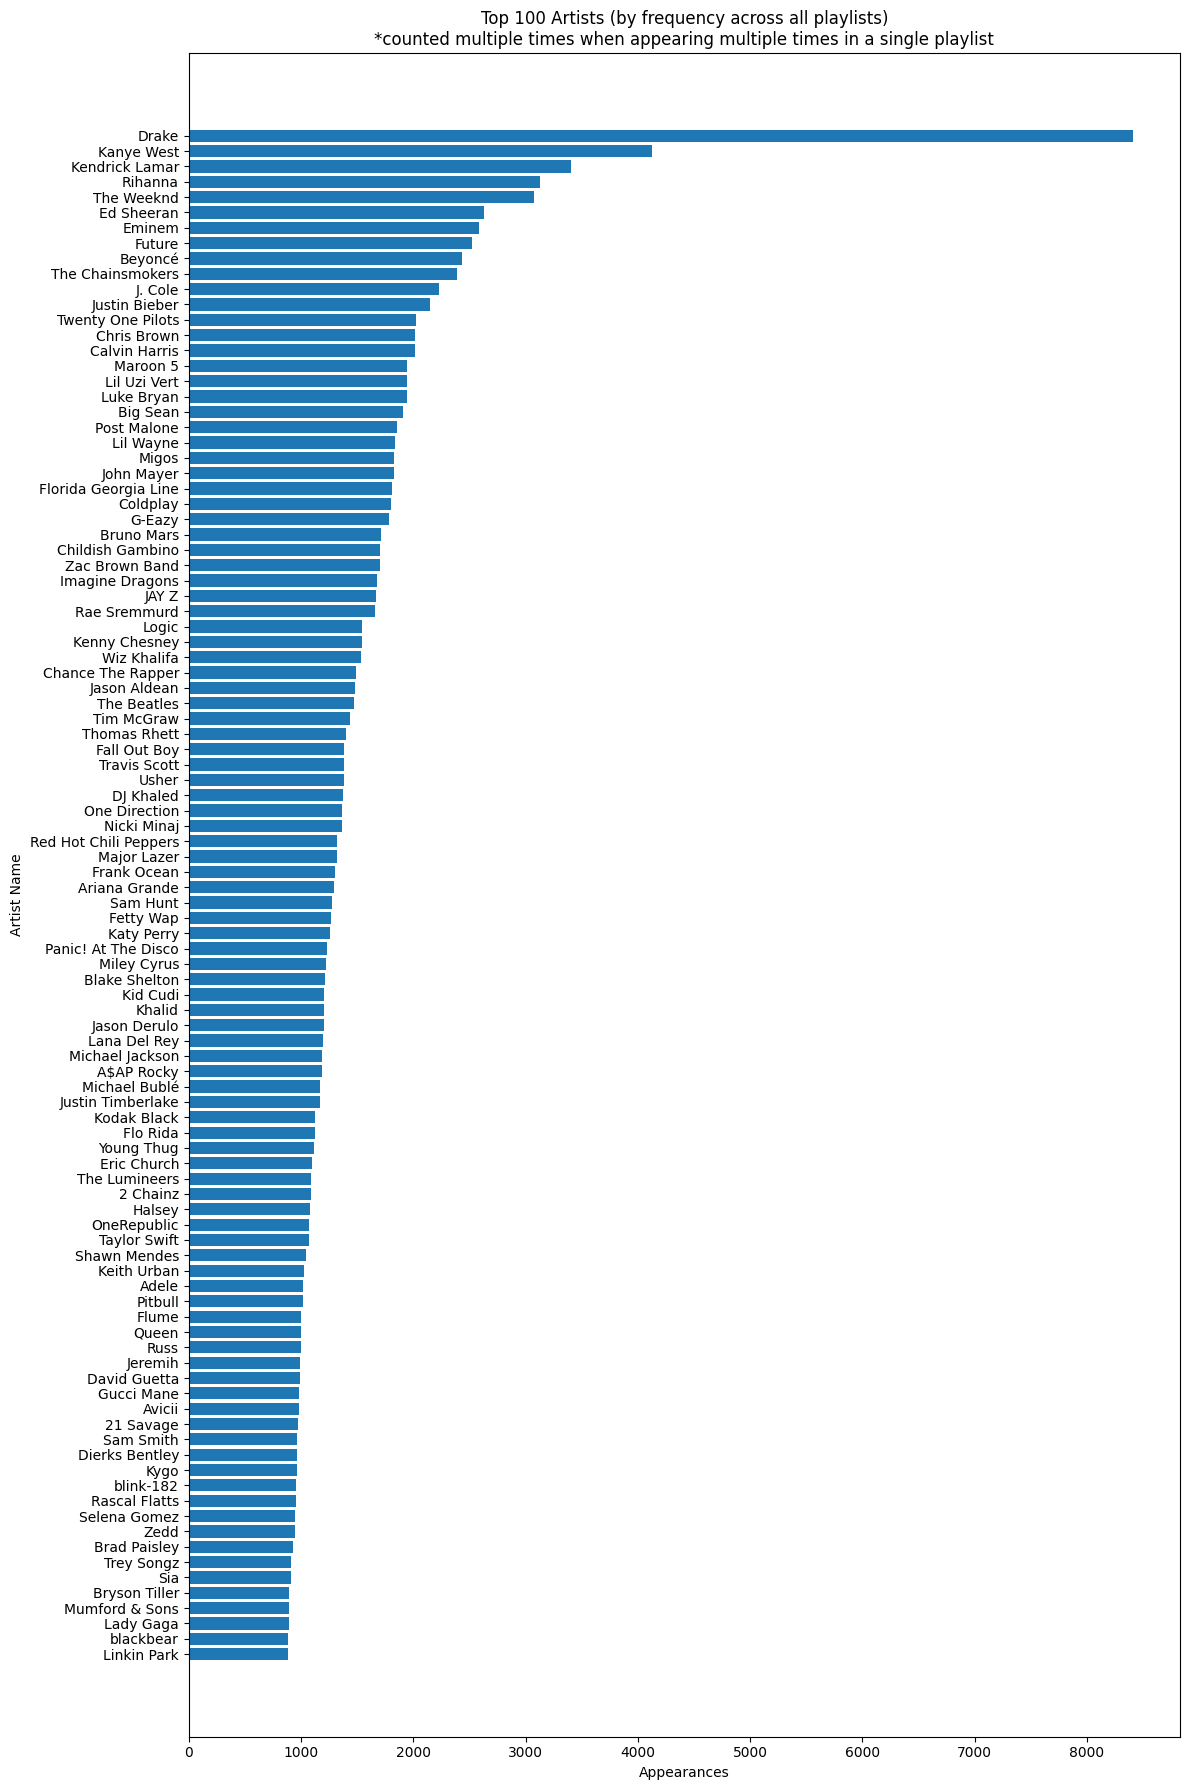

In [269]:
# Most Frequent Artists
most_freq_artists = songs.artist_name.value_counts()
top_100 = most_freq_artists[:100][::-1]

# Plot Top 100 
plt.figure(figsize=(12, 18))
plt.barh(y=top_100.index, width=top_100.values)
plt.title('Top 100 Artists (by frequency across all playlists)\n*counted multiple times when appearing multiple times in a single playlist')
plt.xlabel('Appearances')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()

Above we can see the top 100 artists. Some insights:

- People love Drake
- R&B, Rap, and Pop are king
- Country looks like a close fourth (Florida georgia Line, Thomas Rhett, Zac Brown Band)
- Alternative/Indie is very much alive (Red Hot Chili Peppers, Twenty One Pilots, Fall Out Boy, Blink-182, Imagine Dragons, etc.)
- People still listen to the Beatles, Queen, and the Rolling Stones

#### Song Names

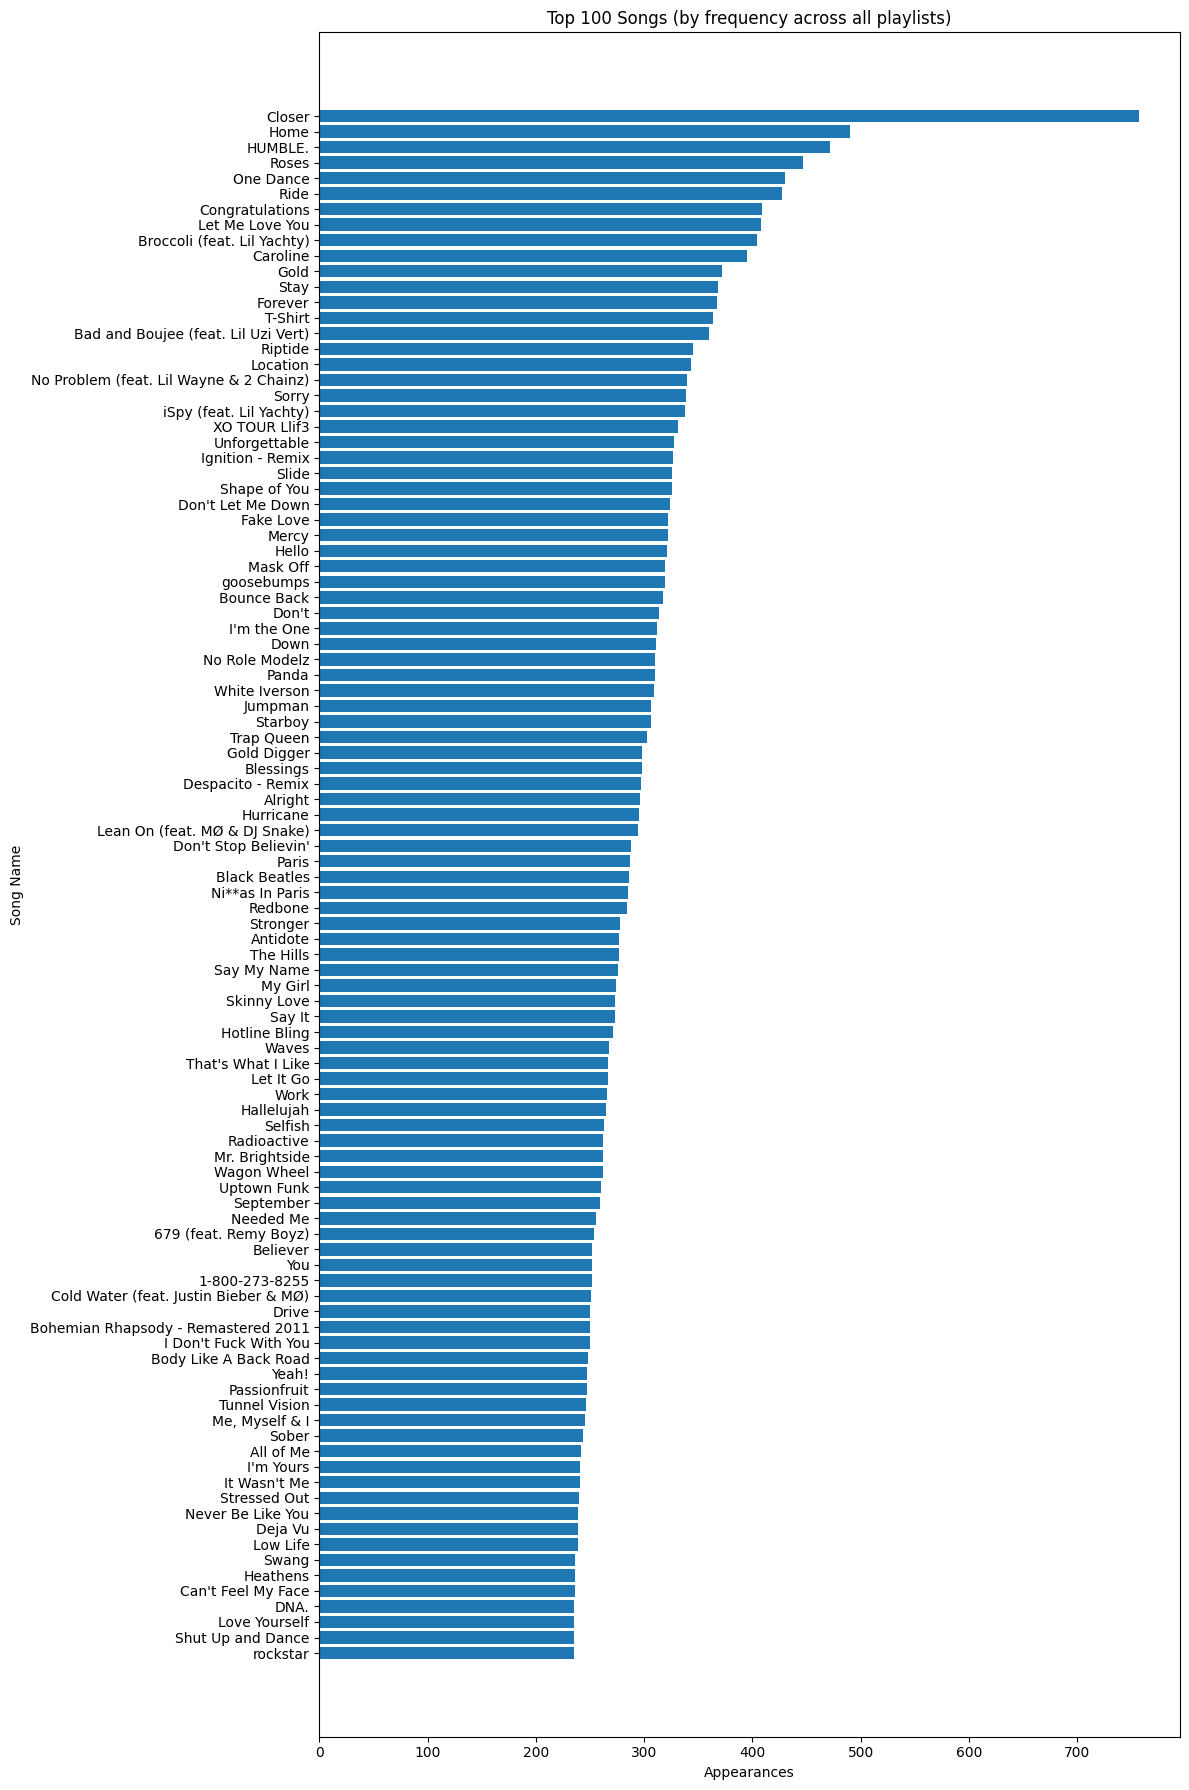

In [270]:
# Most Frequent Songs
most_freq_songs = songs.track_name.value_counts()
top_100 = most_freq_songs[:100][::-1]

# Plot Top 100 
plt.figure(figsize=(12, 18))
plt.barh(y=top_100.index, width=top_100.values)
plt.title('Top 100 Songs (by frequency across all playlists)')
plt.xlabel('Appearances')
plt.ylabel('Song Name')
plt.tight_layout()
plt.show()

Some insights:

- Most popular song among all playlists: Closer by The Chainsmokers
- R. Kelly's scandal seemed to have no impact on the popularity of his Ignition (Remix)
- Once again we can see that Rap and Pop are king

#### Album Names

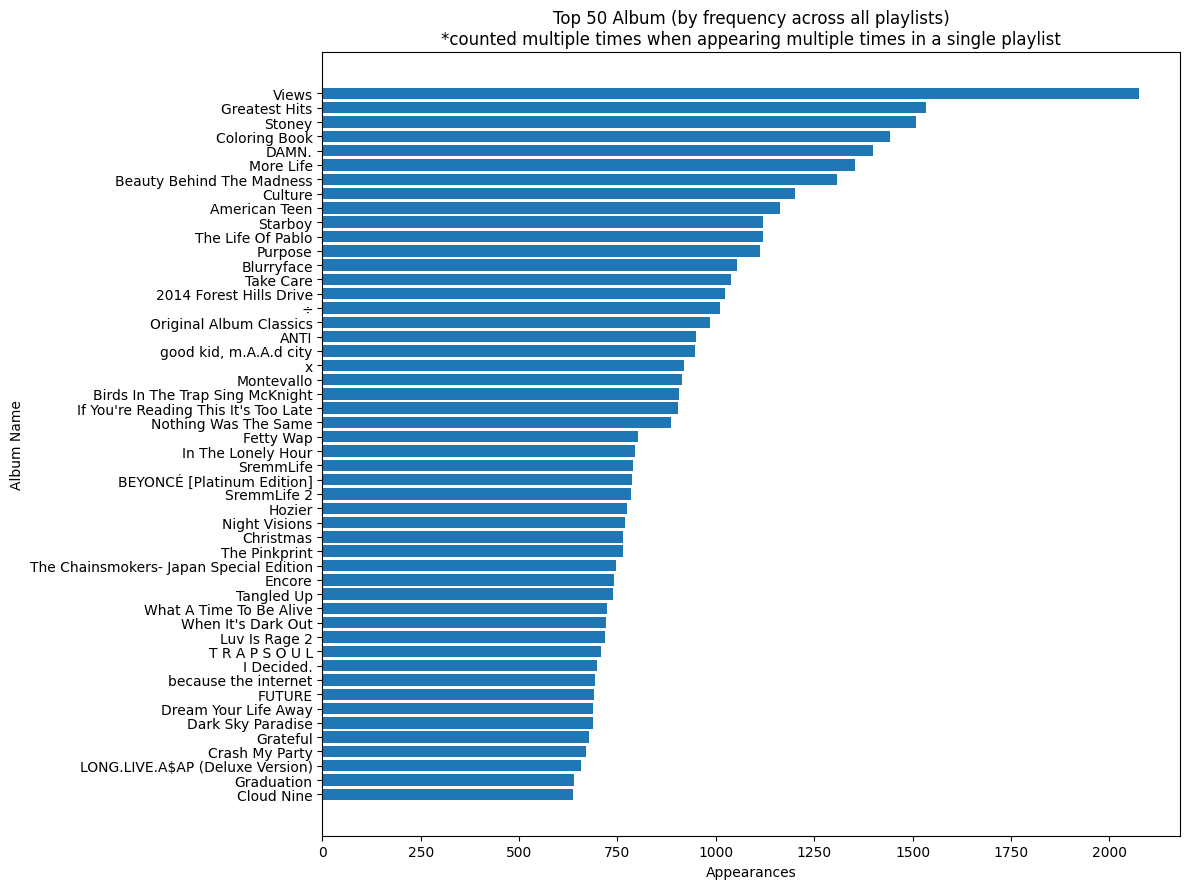

In [271]:
# Most Frequent Albums
most_freq_albums = songs.album_name.value_counts()
top_50 = most_freq_albums[:50][::-1]

# Plot Top 50
plt.figure(figsize=(12, 9))
plt.barh(y=top_50.index, width=top_50.values)
plt.title('Top 50 Album (by frequency across all playlists)\n*counted multiple times when appearing multiple times in a single playlist')
plt.xlabel('Appearances')
plt.ylabel('Album Name')
plt.tight_layout()
plt.show()

Some insights:
- Once, again, Rap/Hip-Hop, Pop, and R&B are king
    - Views (Drake, Rap/Hip-Hop)
    - Stoney (Post Malone, Pop/Hip-Hop)
    - Greatest Hits (would have to go into data to find artist, could be referring to multiple artists)
    - More Life (Drake, Rap/Hip-Hop)
    - DAMN (Kendrick Lamar, Rap/Hip-Hop)
    - American Teen (Khalid, Pop/R&B)
    - Culture (Migos, Rap/Hip-Hop)
    - Purpose (Justin Bieber, Pop)
    - The Life of Pablo (Kanye West, Rap/Hip-Hop)
    
- Once again, people love Drake (Views - Drake is number one album by a large margin)
- Post Malone's Stoney, the 2nd most popular album across all playlists, was interestingly one of his first albums

#### Playlist Duration (Time to Listen Through)

In [272]:
print(f"Mean playlist duration: {playlists.duration_ms.mean() / (1000 * 60 * 60)} hours")
print(f"Std playlist duration: {playlists.duration_ms.std() / (1000 * 60 * 60)} hours")
print(f"Min playlist duration: {playlists.duration_ms.min() / (1000 * 60)} minutes")
print(f"Max playlist duration: {playlists.duration_ms.max() / (1000 * 60 * 60)} hours")

Mean playlist duration: 4.348111098388888 hours
Std playlist duration: 3.5720190152999542 hours
Min playlist duration: 12.276466666666666 minutes
Max playlist duration: 23.08324027777778 hours


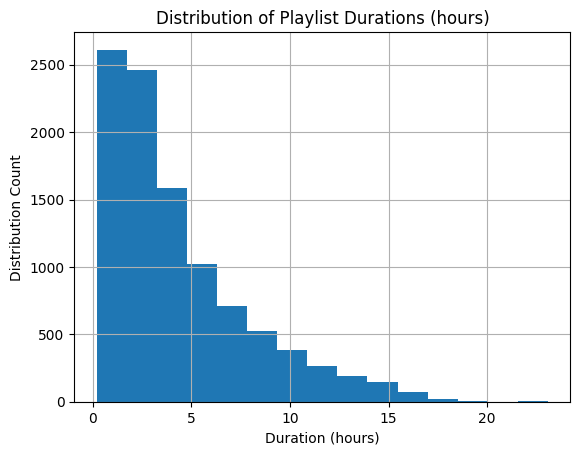

In [273]:
(playlists.duration_ms / (1000 * 60 * 60)).hist(bins=15)
plt.title('Distribution of Playlist Durations (hours)')
plt.xlabel('Duration (hours)')
plt.ylabel('Distribution Count')
plt.show()

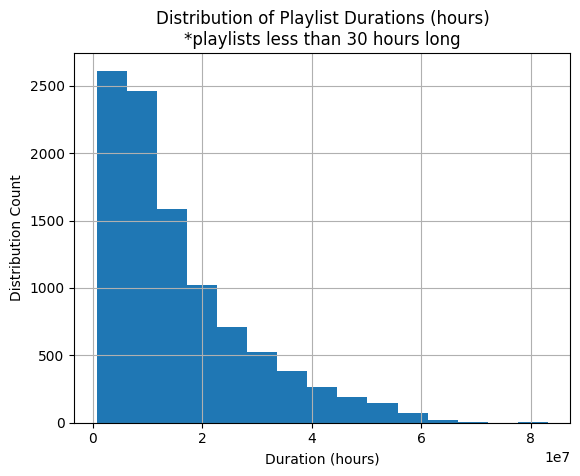

In [274]:
# Filtered: Playlists with a duration less than 30 hours
duration_less_30_hrs = playlists['duration_ms'][playlists.duration_ms < 30 * 1000 * 60 * 60]
duration_less_30_hrs.hist(bins=15)
plt.title('Distribution of Playlist Durations (hours)\n*playlists less than 30 hours long')
plt.xlabel('Duration (hours)')
plt.ylabel('Distribution Count')
plt.show()

#### Followers of Playlist & Some Features Filtered by Most Followed

In [275]:
print(f"Mean playlist followers: {playlists.num_followers.mean()} followers")
print(f"Std playlist followers: {playlists.num_followers.std()} followers")
print(f"Min playlist followers: {playlists.num_followers.min()} follower")
print(f"Max playlist followers: {playlists.num_followers.max()} followers")

Mean playlist followers: 3.5183 followers
Std playlist followers: 161.03646711066395 followers
Min playlist followers: 1 follower
Max playlist followers: 15842 followers


/tmp/ipykernel_158/1849219366.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_500_pid = playlists.sort_values('num_followers', ascending=False)['pid'][:500].values


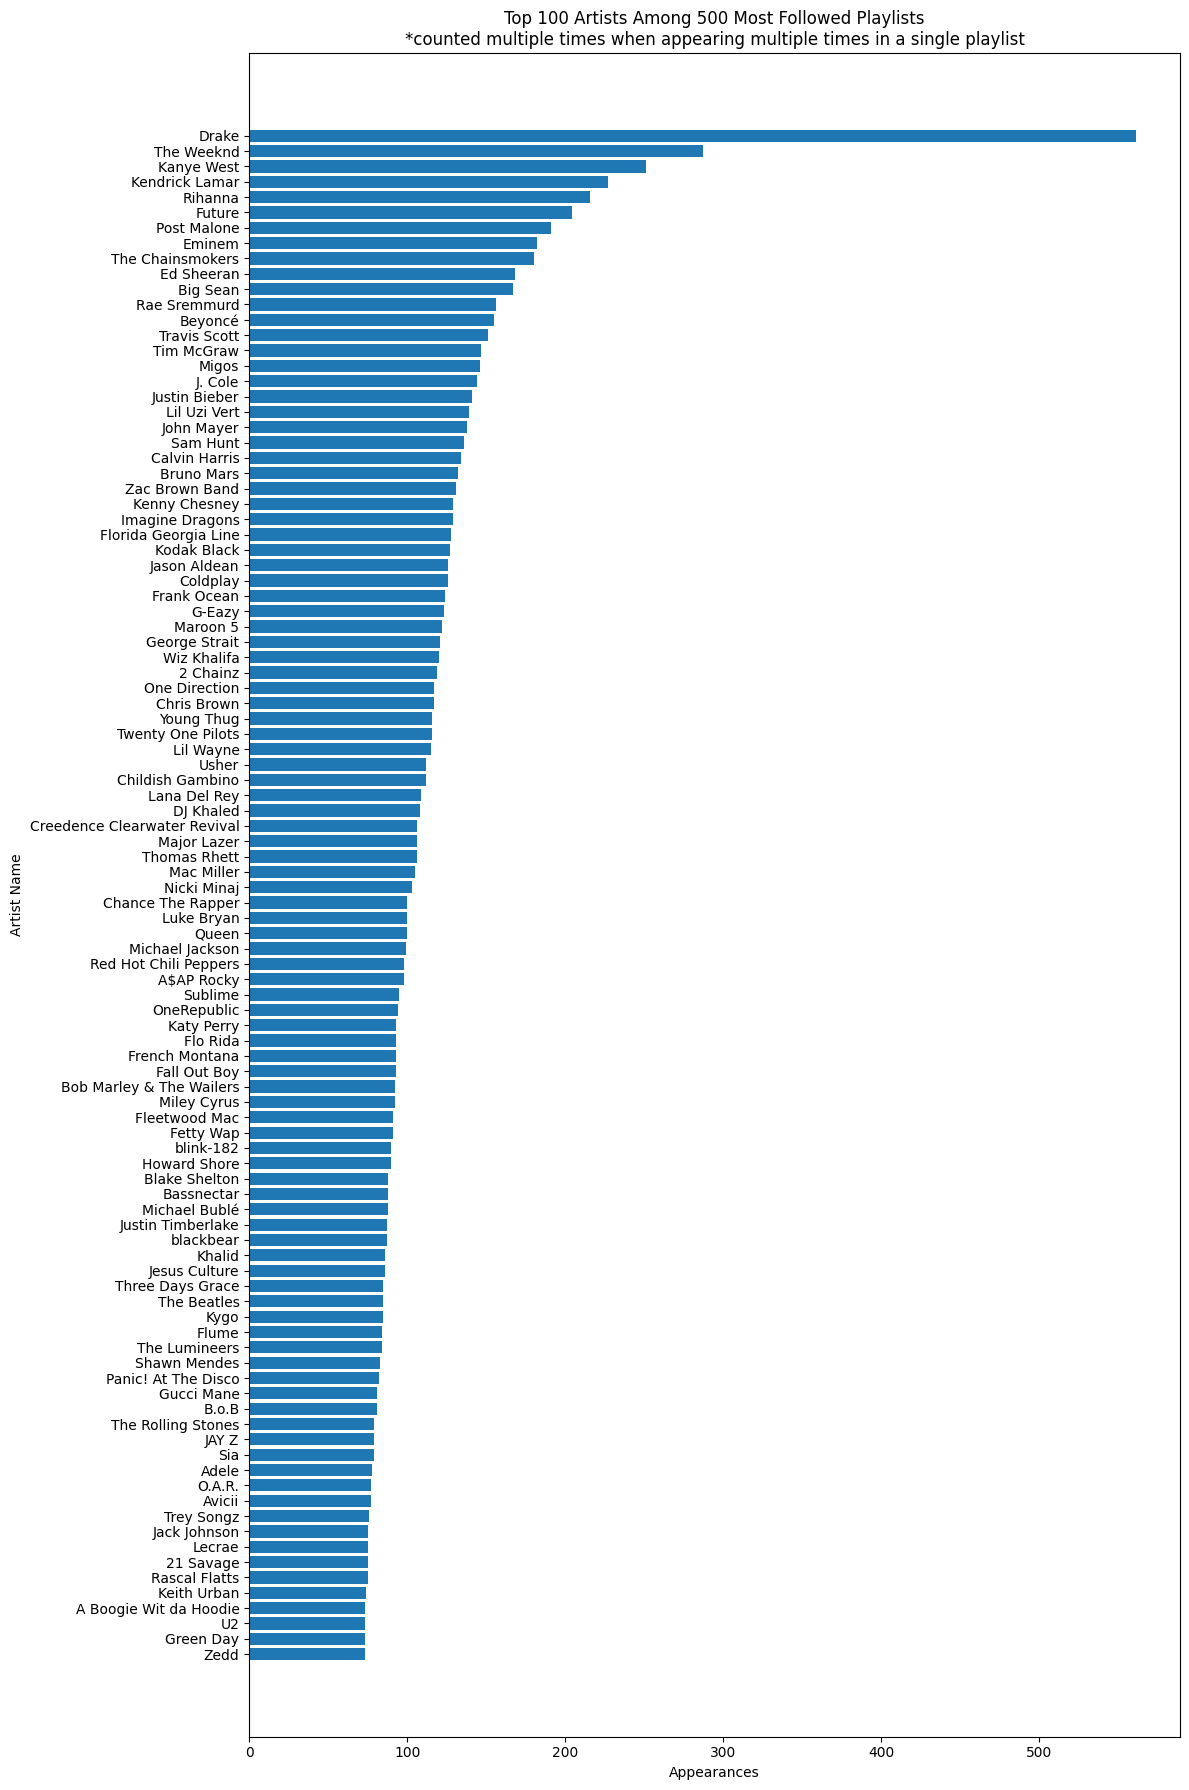

In [276]:
# (a) 100 Most Frequent artists among 500 MOST FOLLOWED playlists

# Get pid's of 500 MOST FOLLOWED Playlists
top_500_pid = playlists.sort_values('num_followers', ascending=False)['pid'][:500].values

# Extract df of songs in each playlist in above list of pid's (top_500_pid)
top_500_playlists = pd.concat([get_playlist(pid) for pid in top_500_pid], axis=0)

# Plot 100 most frequent artists among 500 most followed playlists
top100 = top_500_playlists.artist_name.value_counts()[:100][::-1]
plt.figure(figsize=(12, 18))
plt.barh(y=top100.index, width=top100.values)
plt.title('Top 100 Artists Among 500 Most Followed Playlists\n*counted multiple times when appearing multiple times in a single playlist')
plt.xlabel('Appearances')
plt.ylabel('Artist Name')
plt.tight_layout()
plt.show()

In [280]:
import seaborn as sns

/tmp/ipykernel_158/3638437396.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(songs.corr())


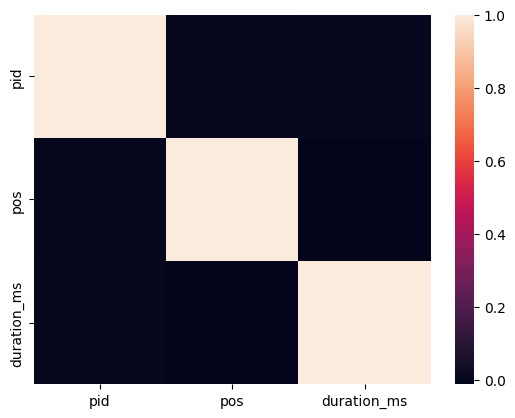

/tmp/ipykernel_158/3638437396.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(playlists.corr())


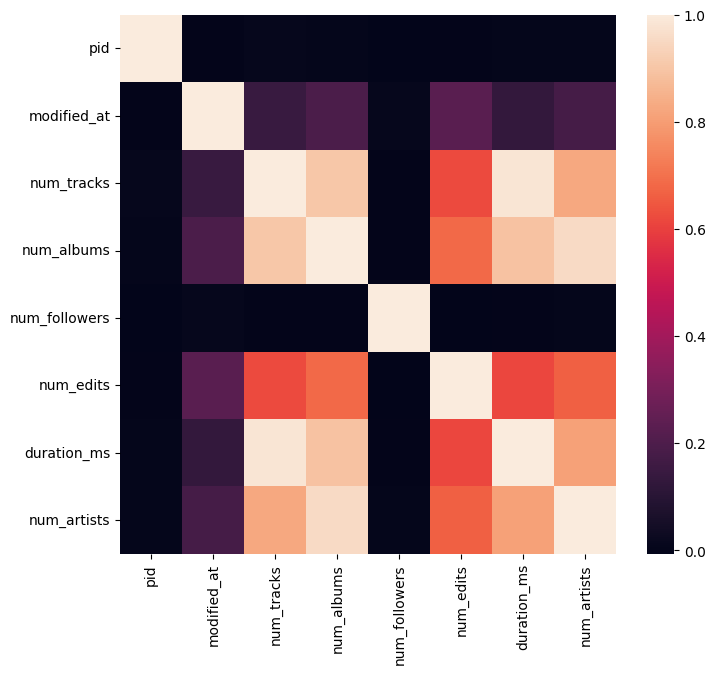

In [281]:
sns.heatmap(songs.corr())
plt.show()

plt.figure(figsize=(8,7))
sns.heatmap(playlists.corr())
plt.show()

- Most high correlations are rather meaningless, for they are completely intuitive (e.g. `duration_ms` and `num_tracks`)
- Somehwat interesting insight: the more times a playlist is edited (`num_edits`), the longer it typically is (`duration_ms`). Somewhat intuitive, but not necessarily obvious.
- No features highly correlated with `num_followers`, which is the only logical feature that could be considered as a target feature in experimenting with a linear regression or other kind of supervised learning model.

#### Other Features

In [282]:
playlists.collaborative.value_counts(normalize=True)

false    0.9781
true     0.0219
Name: collaborative, dtype: float64

Only 2.2% of playlists are collaborative, the rest are not.

SAVING DATAFRAMES AS CSV

In [283]:
playlists.to_csv('playlists.csv')

In [284]:
songs.to_csv('songs.csv')


## Pre-processing Summary

* Converted JSON data of 100,000 playlists to two foundational dataframes, containing data on 100,000 playlists and their songs
* Also saved the data to csv for easier use.